In [1]:
# 1. Import Library
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import json
import os

In [3]:
# 2. Load Model .h5
model = tf.keras.models.load_model('dashboard/model.h5')

In [4]:
# 3. Load Labels dari JSON
with open('dashboard/labels.json', 'r') as f:
    label_dict_raw = json.load(f)

label_dict = {str(v): k for k, v in label_dict_raw.items()}

In [5]:
# 4. Fungsi Preprocessing Gambar
def preprocess_image(img_path, target_size=(224, 224)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0  # Normalisasi
    img_array = np.expand_dims(img_array, axis=0) 
    return img_array

In [ ]:
# 5. Fungsi Inference
def predict_image(img_path):
    img = preprocess_image(img_path)
    prediction = model.predict(img)
    predicted_class = np.argmax(prediction)
    confidence = np.max(prediction)

    label_name = label_dict[str(predicted_class)]

    # Tampilkan hasil
    plt.imshow(image.load_img(img_path))
    plt.axis('off')
    plt.title(f"Predicted: {label_name} ({confidence*100:.2f}%)")
    plt.show()

    return label_name, confidence


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


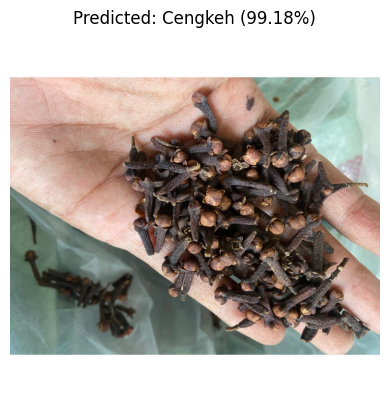

('Cengkeh', 0.9917998)

In [13]:
# 6. Penggunaan
img_path = 'dashboard\contoh.jpg'
predict_image(img_path)